In [10]:
import numpy as np
import random
import time
import math
import random
import os
import json
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *

from to_get_data.generate_database import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD import *
from model_class.UD_aleatory_inheritance import *

In [9]:
t = 600
view = 20
int(t/view)
time_graf = list(range(view, t+1, view))
len(time_graf)

30

In [23]:
#ENDOGAMY 
#Parameters endogamy
experiments = 5
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
mediao= 4 # Average children per UD
#random.seed(42) # Random seed
t = 600 #steps of the simulation
view = 50
inheritance = [0,25,50,75,100, 'False']
time_graf = list(range(view, t+1, view))
#inheritance = ['False']
#inheritance = [15,20,30,35]
data_inherit_endo = {}
data_step_mean_var_ud = {}
data_step_var_system = {}
data_step_unique_system = {}
for inherit in inheritance:
    data_step_mean_var_ud[inherit] = []
    data_step_var_system[inherit] = []
    data_step_unique_system[inherit] = []
    media = mediao
    print(f"Experiments with inheritance {inherit}")
    #Lists to store experiments' data
    data_endo_mean_ud = []
    data_endo_com_level = []
    data_endo_total_varieties = []
    original_media = media
    for exp in range(1, experiments+1):
        mean_var_ud = []
        var_system = []
        unique_system = []
        #print(media)
        #### Initialization endogamy
        ## Communities
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(communities)
        media_inicio_sistema = 0
        if inherit != 'False':
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)        
            #### Simulation endogamy
            for i in range (1, (t+1)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)   
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total)))       
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        else:
            UD_endogamy_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy_al_inh(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy_al_inh.uds.values():
                    random_samples = random.sample(initial_varieties, 3)
                    for sample in random_samples:
                        ud.varieties.append(sample)
            #### Simulation endogamy
            for i in range (1, (t+1)):
                #print(len([var for ud in uds_copy.values() for var in ud.varieties]))
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy_al_inh.uds.items() if ud.activa}
                #print(len([var for ud in uds_copy.values() for var in ud.varieties]))
                alive = len(uds_copy)
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    #print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    #print(media)
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, 3)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
                if i%view == 0:
                    var_ud = []
                    var_total = []
                    for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
                        var_ud.append(len(ud.varieties))
                        for variety in ud.varieties:
                            var_total.append(variety.variety_id)
                    mean_var_ud.append(np.mean(var_ud))
                    var_system.append(len(var_total))
                    unique_system.append(len(set(var_total)))
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        alive = (len([ud for id, ud in uds_copy.items() if ud.activa]))
        if alive >= 80:
            print(f'esta si. {alive}')
            if len(mean_var_ud) == len(time_graf):        
                data_step_var_system[inherit].append(var_system)
                data_step_unique_system[inherit].append(unique_system)
                data_step_mean_var_ud[inherit].append(mean_var_ud)
        data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]
# # Folder
# folder_name = 'results_inheritance_aleatory'
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)
# # Inherit data
# inherit_endo_path = os.path.join(folder_name, 'inherit_data_endo.json')
# # Save
# with open(inherit_endo_path, 'w') as json_file:
#     json.dump(data_inherit_endo, json_file, indent=4)
# # Confirmation message
# print("Data saved successfully to", inherit_endo_path)

Experiments with inheritance 0
131
esta si. 131
104
esta si. 104
87
esta si. 87
99
esta si. 99
189
esta si. 189
Experiments with inheritance 25
103
esta si. 103
100
esta si. 100
112
esta si. 112
22
134
esta si. 134
Experiments with inheritance 50
101
esta si. 101
141
esta si. 141
178
esta si. 178
225
esta si. 225
166
esta si. 166
Experiments with inheritance 75
224
esta si. 224
211
esta si. 211
acabo
0
225
esta si. 225
123
esta si. 123
Experiments with inheritance 100
191
esta si. 191
182
esta si. 182
214
esta si. 214
acabo
0
208
esta si. 208
Experiments with inheritance False
88
esta si. 88
93
esta si. 93
21
105
esta si. 105
143
esta si. 143


In [39]:
data_steps = [data_step_var_system, data_step_unique_system, data_step_mean_var_ud]
data_steps

[{0: [[225, 447, 699, 345, 243, 288, 378, 579, 609, 360, 255, 402],
   [105, 129, 222, 318, 375, 516, 681, 345, 348, 624, 465, 315],
   [132, 189, 213, 387, 630, 510, 261, 339, 510, 618, 246, 279],
   [153, 189, 237, 267, 399, 579, 459, 300, 396, 597, 504, 303],
   [102, 78, 93, 198, 339, 435, 573, 645, 351, 423, 456, 588]],
  25: [[176, 272, 384, 420, 624, 856, 668, 348, 492, 704, 876, 428],
   [200, 252, 320, 448, 552, 816, 700, 288, 412, 668, 908, 408],
   [175, 236, 384, 404, 504, 688, 920, 592, 312, 284, 348, 472],
   [175, 176, 272, 320, 476, 616, 912, 524, 428, 568, 912, 540]],
  50: [[204, 320, 272, 332, 524, 672, 792, 376, 632, 896, 332, 428],
   [208, 400, 644, 872, 436, 344, 444, 844, 588, 388, 420, 584],
   [164, 240, 436, 408, 676, 608, 368, 480, 636, 612, 844, 728],
   [63, 120, 128, 172, 152, 264, 352, 484, 640, 544, 752, 944],
   [75, 108, 92, 124, 108, 244, 404, 672, 680, 772, 412, 692]],
  75: [[104, 124, 140, 264, 256, 244, 432, 720, 716, 480, 612, 916],
   [74, 80, 

0
25
50
75
100
False


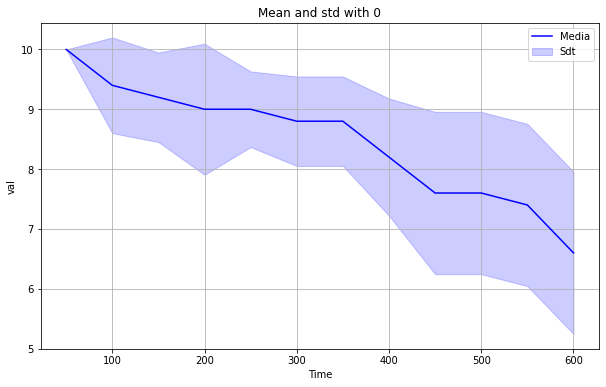

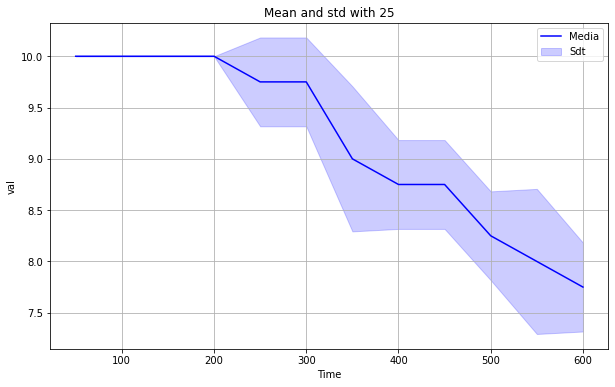

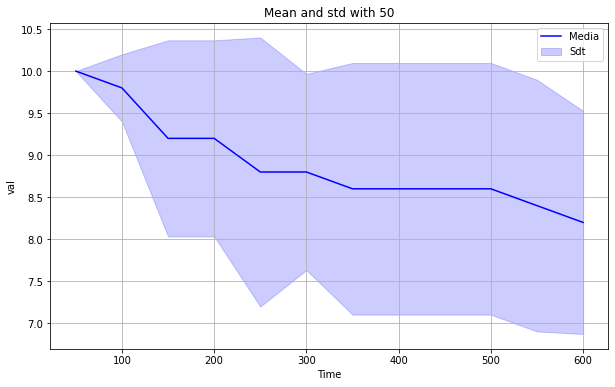

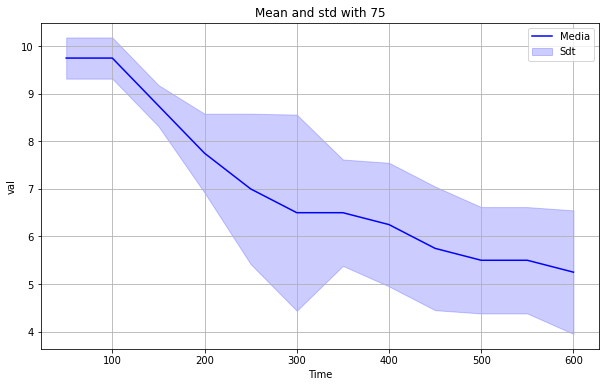

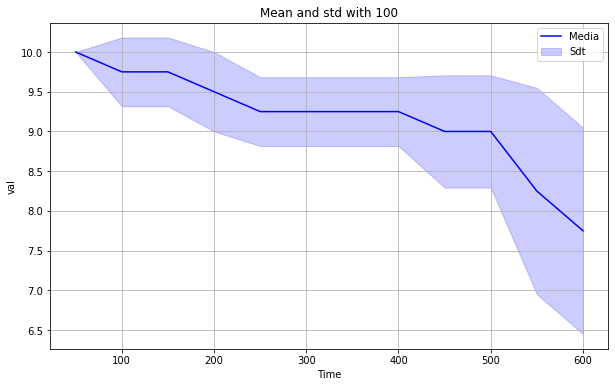

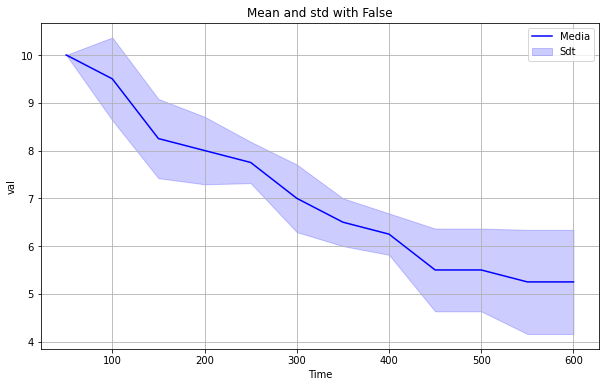

In [29]:
time_graf = list(range(view, t+1, view))
inheritance = [0,25,50,75,100, 'False']
for inherit in inheritance:
    print(inherit)
    medias = np.mean(data_step_var_system[inherit], axis=0)
    desviaciones = np.std(data_step_var_system[inherit], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(time_graf, medias, label='Media', color='b')
    plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color='b', alpha=0.2, label='Sdt')

    plt.xlabel('Time')
    plt.ylabel('val')
    plt.title(f'Mean and std with {inherit}')
    plt.legend()

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

0
25
50
75
100
False


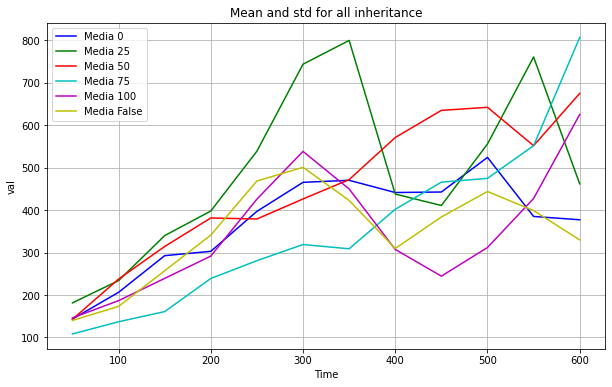

In [36]:
# Define una lista de colores
colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))

for idx, inherit in enumerate(inheritance):
    print(inherit)
    medias = np.mean(data_step_var_system[inherit], axis=0)
    desviaciones = np.std(data_step_var_system[inherit], axis=0)
    
    # Asigna un color diferente a cada línea
    color = colores[idx % len(colores)]
    
    plt.plot(time_graf, medias, label=f'Media {inherit}', color=color)
    #plt.fill_between(time_graf, medias - desviaciones, medias + desviaciones, color=color, alpha=0.2, label=f'Std {inherit}')

plt.xlabel('Time')
plt.ylabel('val')
plt.title('Mean and std for all inheritance')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
time_graf = list(range(50, t, view))
(time_graf)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

In [19]:
for inherit in inheritance:
    print(inherit)
    for data in data_step_mean_var_ud[inherit]:
        print(data)

0
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
25
[11.631578947368421, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
[11.666666666666666, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
50
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
75
[11.702127659574469, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
[11.65, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
100
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
False
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


In [41]:
del data_step_unique_system["False"][2]

In [15]:
600/50
tt = 600
viewt = 50

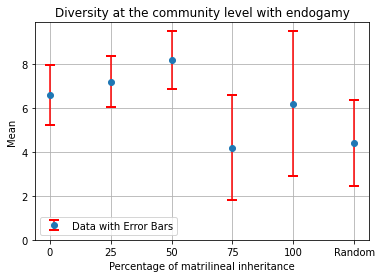

In [37]:
## Data and plot from loaded data
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
inheritance = [0,25,50,75,100, 'False']
#inheritance = ['15','20','30', '35']
#inheritance = [100,90,80,70,60,50, False]
for i in inheritance:
    mean_div_com.append(np.mean(data_inherit_endo[i][1]))
    std_div_com.append(np.std(data_inherit_endo[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Random']
#inheritance_possibilities = ['15','20','30', '35']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.ylim(bottom=0)
plt.title('Diversity at the community level with endogamy')
plt.legend()
plt.grid(True)
plt.show()